In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# 1. Data Processing:

In [2]:
# Loading the data
X_train = pd.read_csv('train_data.csv')
X_test = pd.read_csv('test_data.csv')

In [3]:
# Checking the shape or dimension of the dataframe
print(X_train.shape)
print(X_test.shape)

(507, 148)
(168, 148)


In [4]:
# Removing any rows that have missing data across both sets of data
X_train.dropna(axis = 0,inplace = True)
X_test.dropna(axis = 0,inplace = True)

In [5]:
# Verifying the shape or dimension of the dataframe
print(X_train.shape)
print(X_test.shape)

(507, 148)
(168, 148)


In [19]:
X_train.head(20)

,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,1.32,131,0.81,222.74,1.66,2.18,192.94,235.11,240.15,11.24,...,31.15,5.04,0.80,0.58,8.56,0.82,0.98,-0.10,1512,1287.52
1,1.59,864,0.94,47.56,1.41,1.87,36.82,48.78,57.09,8.15,...,12.01,3.70,0.52,0.96,7.01,1.69,0.86,-0.14,196,2659.74
2,1.41,409,1.00,51.38,1.37,1.53,41.72,51.96,60.48,8.11,...,18.75,3.09,0.90,0.63,8.32,1.38,0.84,0.10,1198,720.38
3,2.58,187,1.91,70.08,3.41,3.11,93.13,55.20,61.92,28.60,...,27.67,6.33,0.89,0.70,8.56,1.10,0.96,0.20,524,891.36
4,2.60,116,2.05,89.57,3.06,3.02,73.17,94.89,100.64,5.41,...,32.05,1.01,0.83,0.75,8.62,2.08,0.08,-0.10,496,1194.76
5,1.30,727,0.34,189.54,1.37,1.35,177.71,188.86,202.07,6.82,...,34.04,1.68,0.86,0.16,8.43,1.10,0.69,0.01,2468,924.57
6,2.33,457,1.03,78.03,2.41,2.50,62.75,83.78,87.57,7.79,...,22.85,1.93,0.80,0.47,8.02,1.28,0.76,-0.11,2466,1178.71
7,2.81,213,1.70,186.84,2.37,2.98,195.35,183.20,181.97,7.08,...,17.17,1.07,0.82,0.60,7.81,1.76,0.24,0.02,906,1200.97
8,2.19,145,1.81,181.15,3.10,2.37,217.18,159.08,167.19,13.26,...,19.56,2.30,0.88,0.77,8.18,1.91,0.57,0.13,850,776.46
9,1.53,304,0.95,140.30,2.16,1.66,118.05,160.32,142.52,14.75,...,49.04,1.93,0.85,0.46,9.08,1.20,0.79,0.01,1192,1076.84


In [9]:
# Creating Y target variable and dropping "class" feature from the X_train and X_test dataframe
y_train = X_train['class']
X_train = X_train.drop(['class'], axis=1)
y_test = X_test['class']
X_test = X_test.drop(['class'], axis=1)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(507, 147)
(507,)
(168, 147)
(168,)


In [11]:
# Scaling all features / predictors (NOT THE TARGET VARIABLE) using StandardScalar
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Random Forest Classifier - Base Model:

In [14]:
# Creating a random forest instance
rf_base = RandomForestClassifier()


In [15]:
# Fitting the random forest instance with default params on scaled train data and y_train
rf_base.fit(X_train_scaled, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
# predicting the classes using the Random forest base model on the scaled test data
y_test_rf_base_pred  = rf_base.predict(X_test_scaled)

In [20]:
# Generating the confusion matrix for Random forest base model on the test data
cf_matrix_rf_base_test = metrics.confusion_matrix(y_test, y_test_rf_base_pred)
cf_matrix_rf_base_test

array([[13,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 1, 22,  0,  2,  0,  0,  0,  0,  0],
       [ 0,  2, 13,  0,  0,  0,  0,  0,  0],
       [ 0,  5,  0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 25,  0,  0,  0,  4],
       [ 1,  0,  1,  0,  0, 13,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0, 13,  0,  0],
       [ 0,  1,  0,  7,  1,  0,  0,  5,  0],
       [ 0,  0,  0,  1,  2,  0,  0,  0, 14]])

In [22]:
# Labelling the confusion matrix
class_labels = ['asphalt','building','car','concrete','grass','pool','shadow','soil','tree']
cf_matrix_rf_base_test = pd.DataFrame(cf_matrix_rf_base_test, index=class_labels, columns=class_labels)

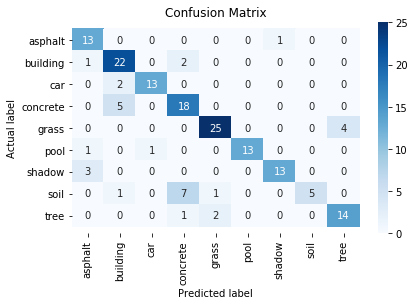

In [23]:
# Creating a heat map for the confusion matrix for Random forest base model on the test data
def conf_matrix_heatmap(confusion_matrix):
    sns.heatmap(confusion_matrix, annot=True, cmap="Blues" ,fmt='')
    plt.tight_layout()
    plt.title('Confusion Matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')


    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.8 # Add 0.8 to the bottom
    t -= 0.8 # Subtract 0.8 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

conf_matrix_heatmap(cf_matrix_rf_base_test)


In [24]:
# Creating a classification report for Random forest base model on the test data
clf_report_rf_base_test = metrics.classification_report(y_test, y_test_rf_base_pred)
print(clf_report_rf_base_test)

              precision    recall  f1-score   support

    asphalt        0.72      0.93      0.81        14
   building        0.73      0.88      0.80        25
        car        0.93      0.87      0.90        15
   concrete        0.64      0.78      0.71        23
      grass        0.89      0.86      0.88        29
       pool        1.00      0.87      0.93        15
     shadow        0.93      0.81      0.87        16
       soil        1.00      0.36      0.53        14
       tree        0.78      0.82      0.80        17

    accuracy                           0.81       168
   macro avg       0.85      0.80      0.80       168
weighted avg       0.83      0.81      0.81       168



Text(0, 0.5, 'Feature Importance')

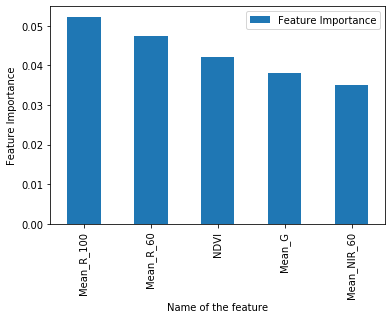

In [26]:
# Identifying the top 5 features and plotting them
# Feature importance plot
feature_imp_rf_base = pd.DataFrame({'Name of the feature': X_test.columns, 'Feature Importance': rf_base.feature_importances_})
feature_imp_rf_base = feature_imp_rf_base.sort_values('Feature Importance', ascending=False).head(5)
ax = feature_imp_rf_base.plot.bar(x='Name of the feature', y='Feature Importance')
ax.set_ylabel('Feature Importance')

In [27]:
# Sequence of feature importace for the Random forest base model
rf_base_importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf_base.feature_importances_,3)})
rf_base_importances = rf_base_importances.sort_values('importance',ascending=False).set_index('feature')
rf_base_importances.head(5)



,importance
feature,
Mean_R_100,0.052
Mean_R_60,0.047
NDVI,0.042
Mean_G,0.038
Mean_NIR_60,0.035


In [28]:
# predicting the classes using the Random forest base model on the train data
y_train_rf_base_pred  = rf_base.predict(X_train_scaled)

In [29]:
# Generating the confusion matrix for Random forest base model on the train data
cf_matrix_rf_base_train = metrics.confusion_matrix(y_train, y_train_rf_base_pred)
cf_matrix_rf_base_train

array([[45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 96,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 21,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 93,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 82,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 14,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 20,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0, 88]])

In [30]:
# Labelling the confusion matrix of the train data
class_labels = ['asphalt','building','car','concrete','grass','pool','shadow','soil','tree']
cf_matrix_rf_base_train = pd.DataFrame(cf_matrix_rf_base_train, index=class_labels, columns=class_labels)

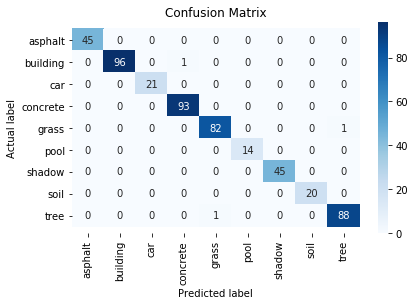

In [31]:
# Creating a heat map the confusion matrix of the train data
conf_matrix_heatmap(cf_matrix_rf_base_train)

In [61]:
# Creating a classification report for Random forest base model on the train data
clf_report_rf_base_train = metrics.classification_report(y_train, y_train_rf_base_pred)
print(clf_report_rf_base_train)

              precision    recall  f1-score   support

    asphalt        1.00      1.00      1.00        45
   building        1.00      0.99      0.99        97
        car        1.00      1.00      1.00        21
   concrete        0.99      1.00      0.99        93
      grass        0.99      0.99      0.99        83
       pool        1.00      1.00      1.00        14
     shadow        1.00      1.00      1.00        45
       soil        1.00      1.00      1.00        20
       tree        0.99      0.99      0.99        89

    accuracy                           0.99       507
   macro avg       1.00      1.00      1.00       507
weighted avg       0.99      0.99      0.99       507



The base model random forest classifier is definitely overfit at this point until we add some custom parameters to the base model random forest classifier . As we notice , the classification metrics for the train data is almost perfect and very much exceeding their corresponding metrics that we obtained using the base model on the test data. . It looks like the train data has been memorized and the base model is not going to perform well when its exposed to other data when the model is deployed to the production environment. Perfect classification for both the classes is observed in the train data along with almost equal to 1 values of metrics like precision , recall and f1-score . There is a huge gap between the training and testing data metrics of the random forest base model. The noise has been memorized and has to be take care of using regularization techniques.

# 3. LinearSVM Classifier - Base Model:

In [36]:
# Creating  a simple LinearSVC Classifier only using default parameters
svc_linear_base = LinearSVC()


In [37]:
# Fitting the simple SVC onto the train data
svc_linear_base.fit(X_train_scaled, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [38]:
# predicting the classes using SVM linear base model on the scaled test data
y_test_svc_linear_base_pred = svc_linear_base.predict(X_test_scaled)

In [39]:
# Generating the confusion matrix for linear SVM base model on the test data
cf_matrix_svc_linear_base_test = metrics.confusion_matrix(y_test, y_test_svc_linear_base_pred)
cf_matrix_svc_linear_base_test

array([[13,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 21,  1,  1,  1,  0,  0,  1,  0],
       [ 0,  2, 12,  0,  0,  0,  0,  0,  1],
       [ 1,  6,  0, 15,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  1, 26,  0,  0,  0,  2],
       [ 1,  0,  1,  0,  0, 13,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0, 14,  0,  0],
       [ 0,  4,  0,  1,  3,  0,  0,  6,  0],
       [ 0,  0,  0,  1,  7,  0,  0,  0,  9]])

In [41]:
# Labelling the confusion matrix of the test data
class_labels = ['asphalt','building','car','concrete','grass','pool','shadow','soil','tree']
cf_matrix_svc_linear_base_test = pd.DataFrame(cf_matrix_svc_linear_base_test, index=class_labels, columns=class_labels)

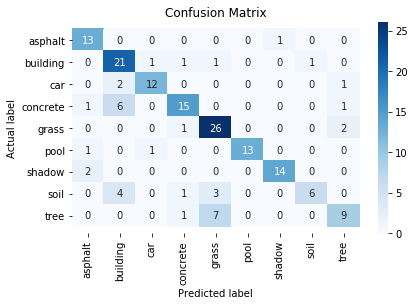

In [42]:
# Creating a heatmap for the confusion matrix for linear SVM base model on the test data
conf_matrix_heatmap(cf_matrix_svc_linear_base_test)

In [43]:
# Creating a classification report for linear SVM base model on the test data
clf_report_svc_linear_base_test = metrics.classification_report(y_test, y_test_svc_linear_base_pred)
print(clf_report_svc_linear_base_test)

              precision    recall  f1-score   support

    asphalt        0.76      0.93      0.84        14
   building        0.64      0.84      0.72        25
        car        0.86      0.80      0.83        15
   concrete        0.79      0.65      0.71        23
      grass        0.70      0.90      0.79        29
       pool        1.00      0.87      0.93        15
     shadow        0.93      0.88      0.90        16
       soil        0.86      0.43      0.57        14
       tree        0.69      0.53      0.60        17

    accuracy                           0.77       168
   macro avg       0.80      0.76      0.77       168
weighted avg       0.78      0.77      0.76       168



In [44]:
# predicting the classes using SVM linear base model on the scaled train data
y_train_svc_linear_base_pred = svc_linear_base.predict(X_train_scaled)

In [45]:
# Generating the confusion matrix for linear SVM base model on the train data
cf_matrix_svc_linear_base_train = metrics.confusion_matrix(y_train, y_train_svc_linear_base_pred)
cf_matrix_svc_linear_base_train

array([[45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 97,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 21,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 93,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 80,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0, 14,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 20,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 89]])

In [46]:
# Labelling the confusion matrix of the train data
class_labels = ['asphalt','building','car','concrete','grass','pool','shadow','soil','tree']
cf_matrix_svc_linear_base_train = pd.DataFrame(cf_matrix_svc_linear_base_train, index=class_labels, columns=class_labels)

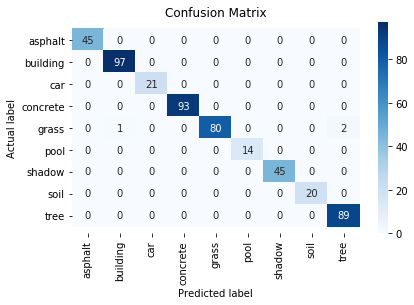

In [47]:
# Creating a heatmap for the confusion matrix for linear SVM base model on the train data
conf_matrix_heatmap(cf_matrix_svc_linear_base_train)

In [48]:
# Creating a classification report for linear SVM base model on the train data
clf_report_svc_linear_base_train = metrics.classification_report(y_train, y_train_svc_linear_base_pred)
print(clf_report_svc_linear_base_train)

              precision    recall  f1-score   support

    asphalt        1.00      1.00      1.00        45
   building        0.99      1.00      0.99        97
        car        1.00      1.00      1.00        21
   concrete        1.00      1.00      1.00        93
      grass        1.00      0.96      0.98        83
       pool        1.00      1.00      1.00        14
     shadow        1.00      1.00      1.00        45
       soil        1.00      1.00      1.00        20
       tree        0.98      1.00      0.99        89

    accuracy                           0.99       507
   macro avg       1.00      1.00      1.00       507
weighted avg       0.99      0.99      0.99       507



There are obvious signs of overfitting looking at the classification report of the linear SVC model on both test and train data. The accuracy of the linear SVC model on the test data is around 0.78 where as for the train data , it was around 0.99 which suggests perfect classification for all the labels and classes that we have in our data. Even the precision , recall , f1 score for each label or class is almost perfect or equal to 1.This makes us belive that the linear SVC model has learned the patterns within the training data in such a way that it has also included the noise within the train data extremely well. This led to our model not been able to achieve high level of accuracy on the test data while making prediction. This model needs regularization in order to reduce the overfitting and lower the variance.

# 4. Support Vector Machine Classifier + Linear Kernel + Grid Search:

In [49]:
# Creating  a simple SVC instance with linear kernel 
svc_linear_kernel = SVC(kernel = "linear")


In [51]:
# Creating a param dict for the grid search
param_grid_svc_linear_kernel = {'C': np.arange(0.01, 10.0, 0.2)}

In [53]:
# Create grid search object for the SVC with linear kernel
svc_linear_kernel_Grid = GridSearchCV(svc_linear_kernel, param_grid_svc_linear_kernel, cv = 5,refit=True, n_jobs=-1, verbose=0, return_train_score=True)

In [54]:
# Performing the grid search for our SVC linear kernel model
svc_linear_kernel_Grid.fit(X_train_scaled, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([0.01, 0.21, 0.41, 0.61, 0.81, 1.01, 1.21, 1.41, 1.61, 1.81, 2.01,
       2.21, 2.41, 2.61, 2.81, 3.01, 3.21, 3.41, 3.61, 3.81, 4.01, 4.21,
       4.41, 4.61, 4.81, 5.01, 5.21, 5.41, 5.61, 5.81, 6.01, 6.21, 6.41,
       6.61, 6.81, 7.01, 7.21, 7.41, 7.61, 7.81, 8.01, 8.21, 8.41, 8.61,
       8.81, 9.01, 9.21, 9.41, 9.61, 9.81])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [55]:
# Identifying the best performing model for our SVC linear kernel model using the grid search
best_svc_linear_kernel = svc_linear_kernel_Grid.best_estimator_
best_svc_linear_kernel

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [56]:
# Identifying the best parameters for our SVC linear kernel model using the grid search
best_svc_linear_params = svc_linear_kernel_Grid.best_params_
best_svc_linear_params

{'C': 0.01}

In [63]:
# Predicting on the test data using best linear kernel model
y_pred_svc_linear_kernel_test = best_svc_linear_kernel.predict(X_test_scaled)

In [64]:
# Generating the confusion matrix for the best linear kernel model on the test data
cf_matrix_svc_linear_kernel_test = metrics.confusion_matrix(y_test, y_pred_svc_linear_kernel_test)
cf_matrix_svc_linear_kernel_test

array([[13,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 22,  0,  2,  1,  0,  0,  0,  0],
       [ 0,  1, 14,  0,  0,  0,  0,  0,  0],
       [ 0,  5,  0, 17,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  1, 25,  0,  0,  0,  3],
       [ 0,  0,  0,  0,  0, 14,  1,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 15,  0,  0],
       [ 0,  3,  0,  5,  2,  0,  0,  4,  0],
       [ 0,  0,  0,  1,  2,  0,  0,  0, 14]])

In [65]:
# Labelling the confusion matrix of the test data
class_labels = ['asphalt','building','car','concrete','grass','pool','shadow','soil','tree']
cf_matrix_svc_linear_kernel_test = pd.DataFrame(cf_matrix_svc_linear_kernel_test, index=class_labels, columns=class_labels)

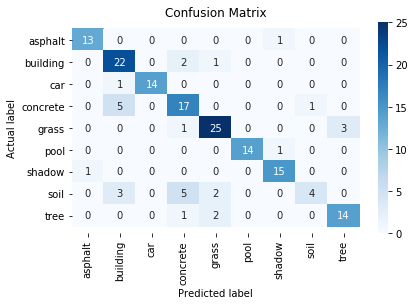

In [66]:
# Creating a heatmap for the confusion matrix for the best linear kernel model on the test data
conf_matrix_heatmap(cf_matrix_svc_linear_kernel_test)

In [67]:
# Creating a classification report for the best linear kernel model on the test data
clf_report_svc_linear_kernel_test = metrics.classification_report(y_test, y_pred_svc_linear_kernel_test)
print(clf_report_svc_linear_kernel_test)

              precision    recall  f1-score   support

    asphalt        0.93      0.93      0.93        14
   building        0.71      0.88      0.79        25
        car        1.00      0.93      0.97        15
   concrete        0.65      0.74      0.69        23
      grass        0.83      0.86      0.85        29
       pool        1.00      0.93      0.97        15
     shadow        0.88      0.94      0.91        16
       soil        0.80      0.29      0.42        14
       tree        0.82      0.82      0.82        17

    accuracy                           0.82       168
   macro avg       0.85      0.81      0.82       168
weighted avg       0.83      0.82      0.81       168



In [68]:
# Predicting on the train data using best linear kernel model
y_pred_svc_linear_kernel_train = best_svc_linear_kernel.predict(X_train_scaled)

In [70]:
# Generating the confusion matrix for the best linear kernel model on the train data
cf_matrix_svc_linear_kernel_train = metrics.confusion_matrix(y_train, y_pred_svc_linear_kernel_train)
cf_matrix_svc_linear_kernel_train

array([[40,  0,  0,  0,  0,  0,  5,  0,  0],
       [ 2, 87,  0,  7,  0,  0,  1,  0,  0],
       [ 0,  1, 19,  1,  0,  0,  0,  0,  0],
       [ 0,  9,  0, 83,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 70,  0,  0,  0, 12],
       [ 0,  1,  0,  0,  1, 12,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 43,  0,  1],
       [ 0,  3,  0,  4,  2,  0,  0, 11,  0],
       [ 0,  0,  0,  0,  3,  0,  1,  0, 85]])

In [ ]:
# Labelling the confusion matrix of the train data
class_labels = ['asphalt','building','car','concrete','grass','pool','shadow','soil','tree']
cf_matrix_svc_linear_kernel_train = pd.DataFrame(cf_matrix_svc_linear_kernel_train, index=class_labels, columns=class_labels)

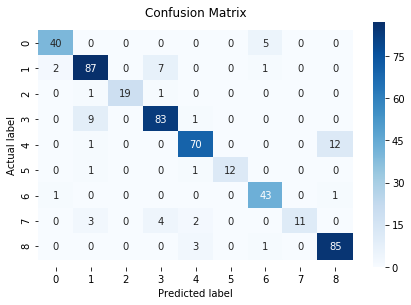

In [71]:
# Creating a heatmap for the confusion matrix for the best linear kernel model on the train data
conf_matrix_heatmap(cf_matrix_svc_linear_kernel_train)

In [72]:
# Creating a classification report for the best linear kernel model on the train data
clf_report_svc_linear_kernel_train = metrics.classification_report(y_train, y_pred_svc_linear_kernel_train)
print(clf_report_svc_linear_kernel_train)

              precision    recall  f1-score   support

    asphalt        0.93      0.89      0.91        45
   building        0.85      0.90      0.87        97
        car        1.00      0.90      0.95        21
   concrete        0.87      0.89      0.88        93
      grass        0.91      0.84      0.88        83
       pool        1.00      0.86      0.92        14
     shadow        0.86      0.96      0.91        45
       soil        1.00      0.55      0.71        20
       tree        0.87      0.96      0.91        89

    accuracy                           0.89       507
   macro avg       0.92      0.86      0.88       507
weighted avg       0.89      0.89      0.89       507



We observed that the accuracy of our SVC with linear kernel best model on test data is around 0.89 and on the train data is around 0.82. There is not a huge gap between the accuracies as we saw if the previous models of random forest base models and linearSVC model. But still we can say that this is not an ideal model because we do see some level of overfitting to a small extent . By looking at the classification metrics , we know that the metrics of precision, recall and f1 score is similar for most of the labels or target classes except a few .So we can conclude by saying that there is a slight or minor overfitting issue or the variance issue which may require some level of regularization to fix that.

# 5. Support Vector Machine Classifier + Polynomial Kernel + Grid Search:

In [73]:
# Creating  a simple SVC instance with polynomial kernel 
svc_poly_kernel = SVC(kernel = "poly")

In [75]:
# Creating a dict of the params for grid search for the polynomial kernel SVC
param_grid_svc_poly_kernel = {
    'C': np.arange(0.01, 10.00, 0.2),
    'degree': [2, 3, 4, 5, 6]
}

In [79]:
# Create grid search object for the SVC with polynomial kernel
svc_poly_kernel_Grid = GridSearchCV(svc_poly_kernel, param_grid_svc_poly_kernel, cv = 5,refit=True, n_jobs=-1, verbose=0, return_train_score=True)

In [80]:
# Performing the grid search for our SVC polynomial kernel model
svc_poly_kernel_Grid.fit(X_train_scaled, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([0.01, 0.21, 0.41, 0.61, 0.81, 1.01, 1.21, 1.41, 1.61, 1.81, 2.01,
       2.21, 2.41, 2.61, 2.81, 3.01, 3.21, 3.41, 3.61, 3.81, 4.01, 4.21,
       4.41, 4.61, 4.81, 5.01, 5.21, 5.41, 5.61, 5.81, 6.01, 6.21, 6.41,
       6.61, 6.81, 7.01, 7.21, 7.41, 7.61, 7.81, 8.01, 8.21, 8.41, 8.61,
       8.81, 9.01, 9.21, 9.41, 9.61, 9.81]),
                         'degree': [2, 3, 4, 5, 6]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [81]:
# Identifying the best performing model for our SVC polynomial kernel model using the grid search
best_svc_poly_kernel = svc_poly_kernel_Grid.best_estimator_
best_svc_poly_kernel

SVC(C=8.41, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [82]:
# Identifying the best parameters for our SVC polynomial kernel model using the grid search
best_svc_poly_params = svc_poly_kernel_Grid.best_params_
best_svc_poly_params

{'C': 8.41, 'degree': 3}

In [83]:
# Predicting on the scaled test data using best polynomial kernel SVC model
y_pred_svc_poly_kernel_test = best_svc_poly_kernel.predict(X_test_scaled)

In [84]:
# Generating the confusion matrix for the best polynomial kernel model on the test data
cf_matrix_svc_poly_kernel_test = metrics.confusion_matrix(y_test, y_pred_svc_poly_kernel_test)
cf_matrix_svc_poly_kernel_test

array([[13,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 22,  0,  2,  1,  0,  0,  0,  0],
       [ 0,  2, 11,  0,  0,  1,  0,  1,  0],
       [ 0,  5,  0, 17,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 26,  0,  0,  1,  2],
       [ 0,  0,  0,  0,  0, 14,  1,  0,  0],
       [ 2,  0,  0,  0,  0,  0, 14,  0,  0],
       [ 0,  3,  0,  4,  6,  0,  0,  1,  0],
       [ 0,  0,  0,  1,  3,  0,  0,  0, 13]])

In [86]:
# Labelling the confusion matrix of the test data
class_labels = ['asphalt','building','car','concrete','grass','pool','shadow','soil','tree']
cf_matrix_svc_poly_kernel_test = pd.DataFrame(cf_matrix_svc_poly_kernel_test, index=class_labels, columns=class_labels)

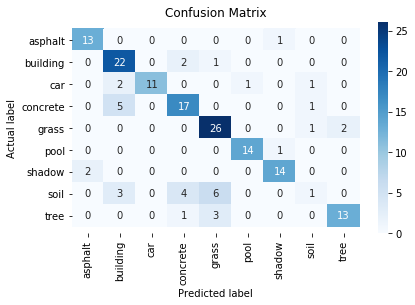

In [87]:
# Creating a heatmap for the confusion matrix for the best polynomial kernel model on the test data
conf_matrix_heatmap(cf_matrix_svc_poly_kernel_test)

In [88]:
# Creating a classification report for the best polynomial kernel model on the test data
clf_report_svc_poly_kernel_test = metrics.classification_report(y_test, y_pred_svc_poly_kernel_test)
print(clf_report_svc_poly_kernel_test)

              precision    recall  f1-score   support

    asphalt        0.87      0.93      0.90        14
   building        0.69      0.88      0.77        25
        car        1.00      0.73      0.85        15
   concrete        0.71      0.74      0.72        23
      grass        0.72      0.90      0.80        29
       pool        0.93      0.93      0.93        15
     shadow        0.88      0.88      0.88        16
       soil        0.25      0.07      0.11        14
       tree        0.87      0.76      0.81        17

    accuracy                           0.78       168
   macro avg       0.77      0.76      0.75       168
weighted avg       0.76      0.78      0.76       168



In [90]:
# Predicting on the scaled train data using best polynomial kernel SVC model
y_pred_svc_poly_kernel_train = best_svc_poly_kernel.predict(X_train_scaled)

In [91]:
# Generating the confusion matrix for the best polynomial kernel model on the train data
cf_matrix_svc_poly_kernel_train = metrics.confusion_matrix(y_train, y_pred_svc_poly_kernel_train)
cf_matrix_svc_poly_kernel_train

array([[45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 97,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 20,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0, 91,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 82,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 13,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  0,  0,  0,  5,  0,  0, 15,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0, 88]])

In [93]:
# Labelling the confusion matrix of the train data
class_labels = ['asphalt','building','car','concrete','grass','pool','shadow','soil','tree']
cf_matrix_svc_poly_kernel_train = pd.DataFrame(cf_matrix_svc_poly_kernel_train, index=class_labels, columns=class_labels)

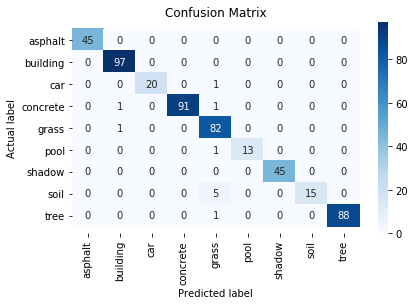

In [94]:
# Creating a heatmap for the confusion matrix for the best polynomial SVC kernel model on the train data
conf_matrix_heatmap(cf_matrix_svc_poly_kernel_train)

In [95]:
# Creating a classification report for the best polynomial kernel SVC model on the train data
clf_report_svc_poly_kernel_train = metrics.classification_report(y_train, y_pred_svc_poly_kernel_train)
print(clf_report_svc_poly_kernel_train)

              precision    recall  f1-score   support

    asphalt        1.00      1.00      1.00        45
   building        0.98      1.00      0.99        97
        car        1.00      0.95      0.98        21
   concrete        1.00      0.98      0.99        93
      grass        0.90      0.99      0.94        83
       pool        1.00      0.93      0.96        14
     shadow        1.00      1.00      1.00        45
       soil        1.00      0.75      0.86        20
       tree        1.00      0.99      0.99        89

    accuracy                           0.98       507
   macro avg       0.99      0.95      0.97       507
weighted avg       0.98      0.98      0.98       507



The polynomial kernel SVC model is even overfit compared to the random forest base model and linearSVC and SVC with linear kernel model in terms of its performance and accuracy metric. The performance of this model is worst compared to all the other preceding models. The classification metrics of the poly kernel SVC model is almost equal to 1 which is perfect but not ideal for modelling. There are obvious signs of overfitting and high variance which can only be fixed by regularization measures. Looks like this model has practically memorized the training data so much so that when it was applied to the test data , its performance in terms of accuracy was not even close to that of training data. Since this model has learned the patterns in the training data including the outliers and other noise, we can the model to generalize better so that it could be applied to other unseen data to achieve a high level of accuracy.

# 6. Support Vector Machine Classifier + RBF Kernel + Grid Search:

In [96]:
# Creating  a simple SVC instance with RBF kernel 
svc_rbf_kernel = SVC(kernel = "rbf")

In [97]:
# Creating a dict of the params for grid search for the RBF kernel SVC
param_grid_svc_rbf_kernel = {
    'C': np.arange(0.01, 10.00, 0.2),
    'gamma': [0.01, 0.1, 1, 10, 100]}

In [98]:
# Create grid search object for the SVC with RBF kernel
svc_rbf_kernel_Grid = GridSearchCV(svc_rbf_kernel, param_grid_svc_rbf_kernel, cv = 5,refit=True, n_jobs=-1, verbose=0)

In [99]:
# Performing the grid search for our SVC RBF kernel model
svc_rbf_kernel_Grid.fit(X_train_scaled, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([0.01, 0.21, 0.41, 0.61, 0.81, 1.01, 1.21, 1.41, 1.61, 1.81, 2.01,
       2.21, 2.41, 2.61, 2.81, 3.01, 3.21, 3.41, 3.61, 3.81, 4.01, 4.21,
       4.41, 4.61, 4.81, 5.01, 5.21, 5.41, 5.61, 5.81, 6.01, 6.21, 6.41,
       6.61, 6.81, 7.01, 7.21, 7.41, 7.61, 7.81, 8.01, 8.21, 8.41, 8.61,
       8.81, 9.01, 9.21, 9.41, 9.61, 9.81]),
                         'gamma': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [100]:
# Identifying the best performing model for our SVC RBF kernel model using the grid search
best_svc_rbf_kernel = svc_rbf_kernel_Grid.best_estimator_
best_svc_rbf_kernel

SVC(C=4.21, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [101]:
# Identifying the best parameters for our SVC RBF kernel model using the grid search
best_svc_rbf_params = svc_rbf_kernel_Grid.best_params_
best_svc_rbf_params

{'C': 4.21, 'gamma': 0.01}

In [102]:
# Predicting on the scaled test data using best RBF kernel SVC model
y_pred_svc_rbf_kernel_test = best_svc_rbf_kernel.predict(X_test_scaled)

In [103]:
# Generating the confusion matrix for the best RBF kernel model on the test data
cf_matrix_svc_rbf_kernel_test = metrics.confusion_matrix(y_test, y_pred_svc_rbf_kernel_test)
cf_matrix_svc_rbf_kernel_test

array([[13,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 21,  0,  3,  1,  0,  0,  0,  0],
       [ 0,  1, 13,  1,  0,  0,  0,  0,  0],
       [ 0,  4,  0, 19,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 26,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0, 14,  1,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 15,  0,  0],
       [ 0,  2,  0,  4,  3,  0,  0,  5,  0],
       [ 0,  0,  0,  1,  1,  0,  0,  0, 15]])

In [104]:
# Labelling the confusion matrix of the test data
class_labels = ['asphalt','building','car','concrete','grass','pool','shadow','soil','tree']
cf_matrix_svc_rbf_kernel_test = pd.DataFrame(cf_matrix_svc_rbf_kernel_test, index=class_labels, columns=class_labels)

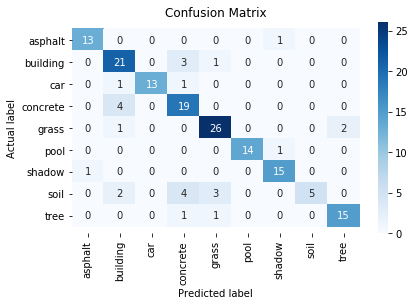

In [105]:
# Creating a heatmap for the confusion matrix for the best RBF kernel SVC model on the test data
conf_matrix_heatmap(cf_matrix_svc_rbf_kernel_test)

In [106]:
# Creating a classification report for the best RBF kernel model on the test data
clf_report_svc_rbf_kernel_test = metrics.classification_report(y_test, y_pred_svc_rbf_kernel_test)
print(clf_report_svc_rbf_kernel_test)

              precision    recall  f1-score   support

    asphalt        0.93      0.93      0.93        14
   building        0.72      0.84      0.78        25
        car        1.00      0.87      0.93        15
   concrete        0.68      0.83      0.75        23
      grass        0.84      0.90      0.87        29
       pool        1.00      0.93      0.97        15
     shadow        0.88      0.94      0.91        16
       soil        1.00      0.36      0.53        14
       tree        0.88      0.88      0.88        17

    accuracy                           0.84       168
   macro avg       0.88      0.83      0.84       168
weighted avg       0.86      0.84      0.83       168



In [107]:
# Predicting on the scaled train data using best RBF kernel SVC model
y_pred_svc_rbf_kernel_train = best_svc_rbf_kernel.predict(X_train_scaled)

In [108]:
# Generating the confusion matrix for the best RBF kernel model on the train data
cf_matrix_svc_rbf_kernel_train = metrics.confusion_matrix(y_train, y_pred_svc_rbf_kernel_train)
cf_matrix_svc_rbf_kernel_train

array([[45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 97,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 21,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 92,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 82,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 14,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 20,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0, 88]])

In [109]:
# Labelling the confusion matrix of the train data
class_labels = ['asphalt','building','car','concrete','grass','pool','shadow','soil','tree']
cf_matrix_svc_rbf_kernel_train = pd.DataFrame(cf_matrix_svc_rbf_kernel_train, index=class_labels, columns=class_labels)

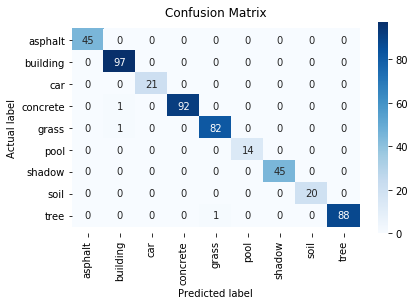

In [110]:
# Creating a heatmap for the confusion matrix for the best RBF kernel SVC model on the train data
conf_matrix_heatmap(cf_matrix_svc_rbf_kernel_train)

In [111]:
# Creating a classification report for the best RBF kernel model on the train data
clf_report_svc_rbf_kernel_train = metrics.classification_report(y_train, y_pred_svc_rbf_kernel_train)
print(clf_report_svc_rbf_kernel_train)

              precision    recall  f1-score   support

    asphalt        1.00      1.00      1.00        45
   building        0.98      1.00      0.99        97
        car        1.00      1.00      1.00        21
   concrete        1.00      0.99      0.99        93
      grass        0.99      0.99      0.99        83
       pool        1.00      1.00      1.00        14
     shadow        1.00      1.00      1.00        45
       soil        1.00      1.00      1.00        20
       tree        1.00      0.99      0.99        89

    accuracy                           0.99       507
   macro avg       1.00      1.00      1.00       507
weighted avg       0.99      0.99      0.99       507



There are very clear signs of overfitting in this RBF kernel SVC model since the accuracy on the train data is 0.99 which is significantly higher when compared to that of test data which is 0.84.

It looks like our SVC model with RBF kernel has practically  memorized our training data extremly well including the noise (outliers). The classification reports of the train data indicates close to perfect classification, with 100% in precision, 100% perfect recall and 99% f1-score for most of the target classes or labels.

Taking all these indicators into consideration we can clearly say that the SVC RBF ernel  model is not going to accurately predict the observations when it is exposed to new data as this model is overfit and needs to be regularized.


# 7. Conceptual Questions:

a) From the models run in steps 2-6, which performs the best based on the Classification Report? Support your reasoning with evidence around your test data. 

lets take a look at each of the classification reports of Random forest base model, Linear SVC , SVC with linear kernel grid search, SVC with polynomial kernel, and SVC with RBF kernel

In [112]:
print("Random Forest Base Model classification report on Test data")
print(clf_report_rf_base_test)
print("*"*90)
print("\n\n")
print("Linear SVM classifier base model classification report on Test data")
print(clf_report_svc_linear_base_test)
print("*"*90)
print("\n\n")
print("SVC with linear kernel best Model(grid search) classification report on Test data")
print(clf_report_svc_linear_kernel_test)
print("*"*90)
print("\n\n")
print(" SVC with Polynomial kernel best Model(grid search) classification report on Test data")
print(clf_report_svc_poly_kernel_test)
print("*"*90)
print("\n\n")
print(" SVC with RBF kernel best Model(grid search) classification report on Test data")
print(clf_report_svc_rbf_kernel_test)
print("*"*90)

Random Forest Base Model classification report on Test data
              precision    recall  f1-score   support

    asphalt        0.72      0.93      0.81        14
   building        0.73      0.88      0.80        25
        car        0.93      0.87      0.90        15
   concrete        0.64      0.78      0.71        23
      grass        0.89      0.86      0.88        29
       pool        1.00      0.87      0.93        15
     shadow        0.93      0.81      0.87        16
       soil        1.00      0.36      0.53        14
       tree        0.78      0.82      0.80        17

    accuracy                           0.81       168
   macro avg       0.85      0.80      0.80       168
weighted avg       0.83      0.81      0.81       168

******************************************************************************************



Linear SVM classifier base model classification report on Test data
              precision    recall  f1-score   support

    asphalt       

The SVC model with the linear kernel is the best model with overall best performance even though it doesnt have the best accuracy among all other model discussed above. Moreover in terms of other classification metrics like precision , recall , f1 score , linear kernel SVC has performed better for most of the target classes or target labels for classification.
The performance of RBF kernel SVC and linear kernel SVC are almost the same but since the input data is easily linearly separable , it doesnt make any sense to apply non linear kernel functions like polynomial or RBF kernel which lead to massive overfitting  and high variance.
If we consider the classification metrics only on the test data, then RBF kernel SVC model stands out and outperforms all other models including the linear kernel SVC in terms of accuracy in particular.

We also observe that the linear kernel SVC was able to better generalize the input data and find important underlying patterns within the data without learning the noise. Thats why it has overall low bias and also low variance.

Where as the polynomial and the RBF kernel SVC models have very high variance and they created overfit models that had a hige gap between the classification metrics of train and test data.
In terms of accuracy , the SVC model with RBF kernel is the best performing model with an accuracy of 0.84. 
SVC model with the linear kernel is the 2nd best with an accuracy of 0.82 with random forest base being the 3rd best followed by SVC model with polynomial kernel being 4th best and last position taken by linear SVM base classifier.


b) Compare models run for steps 4-6 where different kernels were used. What is the benefit of using a polynomial or rbf kernel over a linear kernel? What could be a downside of using a polynomial or rbf kernel?


The benefit of using a polynomial or RBF kernel over a linear kernel SVC is about the true decision boundary. If the decision boundary turns out to be linear , then linear kernel SVC outperforms most of the models . If the decision boundary is non-linear , then polynomial kernel SVC will be much helpful and ca help approximate the decision boundary non-linearly. Radial basis function kernel SVC performs well in situations where the decision boundary is much localized. Any particular dataset may not always be linearly separable because we cannot separate our datapoints into different target classes or labels simply by drawing a linear line as a decision bounday. For that reason and many other reasons , we have been provided with options of employing various kernel functions to map the original data into high dimensional space so that we can construct a hyperplane decision boundary.

In short polynomial and RBF kernel SVC models can be used only if the input data is not linearly separable. As it is quite evident from our classification metrics on test VS train data that the  SVC model with linear kernel is the only model with low variance and is less overfit compared to all other models that we discussed above. this means that the data was linearly separable and thats the reason our SVC linear kernel model had the best performance both in the test and train data. The non-linear methods of radial basis and polynomial were much more prone to overfitting in this case.

With the grid search we have used 3 different models which were SVC model with linear kernel, SVC model with polynomial kernel and SVC model with radial basis function kernel. SVC with linear kernel performed much better compared to the polynomial kernel. It has better precision , recall and f1 score for most of the target classes or labels besidss having the overall(2nd best) good accuracy.

One of the main downside for the polynomial and rbf kernels is their numerical instability when it comes to their hyperparameters where the kernel function is effectively trying to draw a circle around a line which makes no sense because the data in our case is easily linearly separable. Thats why the SVC model with linear kernel overall performed well compared to these non-linear models.

c) Explain the 'C' parameter used in steps 4-6. What does a small C mean versus a large C in sklearn? Why is it important to use the 'C' parameter when fitting a model? 


'C' is considered as the regularization parameter that controls the decision bounday within the SVM and manages its placement or location in the space. If we have a high value of C, it means that we could have a wider margin between the decision boundary and the hyperplane on both sides of the margin that involves support vectors. This means that there is a higher tolerance for misclassification. If we have a low value of C , it means that there is a lower tolerance for misclassification and it gives rise to a tighter margin. If we are using C as our hyperparameters in our SVM models, the total amount of error which is calculated when any datapoint is misclassified cannot exceed the value set for C. That is why the optimization will depend on the value of C to a great extent.

We have a looser classification margin with low values of classification metrics like accuracy , precision , recall anf f1 score. On the other hand , a larger value of C means a tighter or stricter classification margin with high values of classification metrics like accuracy , precision, recall and f1 score.

A low of C leads to high bias and lower variance . A high value of C leads to low bias but high variance.

If the value of C is too large , it is very likely that it will overfit the data where as if the value of C is too low , then it will underfit the data by not giving enough attention or weight to the data points that are farther away from the margin.

That is why a trade-off has to be made when using C as a regularization parameter between minimizing the value of C to reduce the margin violations which helps in achieving low bias or error on the training data and minimizing the norm of the weights ( to increase the margin generated by the SVM)  because the value of C plays a huge role in the objective function. Tuning the value of regularization parameter C controls the overfitting and underfitting of the models.


d) Scaling our input data does not matter much for Random Forest, but it is a critical step for Support Vector Machines. Explain why this is such a critical step. Also, provide an example of a feature from this data set that could cause issues with our SVMs if not scaled.

Since SVM is a maximal margin classifier which works by maximizing the space or the distance between the separating plane and the support vectors ( which exist on the parallel boundary). SVM models are always very much sensitive to the scales of the features or predictors as the features or predictors with a greater scale will have a greater role or influence in the calculation of the separating margin or the distance between the separating plane and the support vectors.

The non-scaled features or data in general gives rise to a decision hyperplane thsat is highly sensitive to the regularization parameter or hyperparameter "C". The scaled data makes sure that the hyperplanes of SVM model are more consistent across hyperparameters.

Now lets take a look at the features that might have a huge negative impact on the calculation of the separating margin if left unscaled.


In [113]:
# We will only take a look the predictors hence X_train will be helpful
X_train.describe()

,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
count,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,...,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000
mean,2.025720,562.504931,1.237574,165.612939,2.187081,2.277318,166.290355,162.291953,168.256667,10.725227,...,24.601144,2.931657,0.817712,0.597732,8.048698,1.455838,0.653905,0.027436,1398.706114,1101.998185
std,0.619254,698.655240,0.561988,63.230806,0.874054,0.718441,59.217648,73.455101,69.702475,4.968761,...,12.203441,4.942887,0.106007,0.197505,0.787912,0.451781,0.251287,0.133834,1097.323462,533.927869
min,1.000000,22.000000,0.000000,26.850000,1.000000,1.040000,22.910000,26.520000,31.110000,3.550000,...,2.650000,1.000000,0.200000,0.100000,5.690000,0.240000,0.030000,-0.360000,34.000000,211.270000
25%,1.580000,159.000000,0.840000,127.485000,1.650000,1.715000,146.460000,97.585000,111.715000,6.985000,...,14.485000,1.375000,0.770000,0.455000,7.370000,1.160000,0.470000,-0.080000,601.000000,726.745000
50%,1.950000,323.000000,1.210000,170.650000,2.000000,2.180000,189.630000,158.280000,167.750000,9.290000,...,22.380000,1.920000,0.840000,0.610000,8.020000,1.440000,0.710000,-0.020000,1148.000000,1011.230000
75%,2.380000,681.500000,1.565000,224.825000,2.490000,2.675000,206.780000,237.375000,238.480000,13.330000,...,33.825000,2.800000,0.890000,0.760000,8.750000,1.775000,0.860000,0.145000,1874.000000,1335.640000
max,4.530000,5767.000000,3.520000,245.870000,8.070000,5.410000,239.370000,253.610000,253.630000,30.870000,...,61.340000,64.700000,0.970000,1.000000,9.570000,2.410000,1.000000,0.370000,8896.000000,3619.280000


It is quite obvious that the features like "Area", "Mean_G", Mean_R" and "Mean_NIR" that have a higher mean and higher standard deviation compared to the other features. Letting these kind of features remain in the model without scaling and fitting the model will lead to inaccurate or skewed results because certain features on higher scale will try to dominate other features while calculating the distance between the hyperplanes. Hence we have to first scale all the features and bring them into a single scale and then we can train and fit our model making sure that it gives accurate results and creates an optimized hyperplane separation.

Since support vector machines optimizes by minimizing the decision boundary,  the hyperplane is greatky influenced by the scale of the features or predictors and that is why it is highly recommended to scale or standardize the data.

e) Describe conceptually what the purpose of a kernel is for Support Vector Machines.


The kernel or the kernel function within any SVM model is used to maximizing the distance between the classes or target labels  in a way that could maximize the distance between the hyperplanes while doing the classification.
Kernel helps in mapping the input data to a higher dimension and then help find a boundary in order to make the classification . In other words kernel helps to map the input data into a feature space  that is enlarged for convenience so that the model could  better construct a decision boundary of the hyperplane without calculating the vectors of each datapoint.

Kernel is basically a mathematical function that computes the dot product of two vectors that helps to tranform the input data to higher dimensions where they can be non-linearly separated for classification.

In most of the cases where the data is non-linearly separable for classification using a linear decision boundary, we have to map our original data from 2-D to 3-D space and then separate the datapoints. But this mapping from 2-D to 3-Dor even higher dimensional spaces is not easy because it requires the computation of dot products within that higher diemnsional space which requires more resources in terms of memory space, computational resources which turns out to be very expensive. This is where kernel or kernel tricks takes over the problem and helps us operate in the operate in the original feature space without even computing the coordinates in the higher dimensional space.
This is a very powerful technique that requires less computational cost while separating the data that is non-linear in nature.